## Task 27-> Evaluation Techniques for classification models
Submitted by: Awais Anwer

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
from sklearn import datasets

In [26]:
# Load the Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

df = pd.DataFrame(data=np.c_[X, y], columns=wine.feature_names + ['target'])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [46]:
# Training
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [47]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

In [48]:
## Evaluation techniques
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 9  1  0]
 [ 1 14  2]
 [ 0  0  9]]


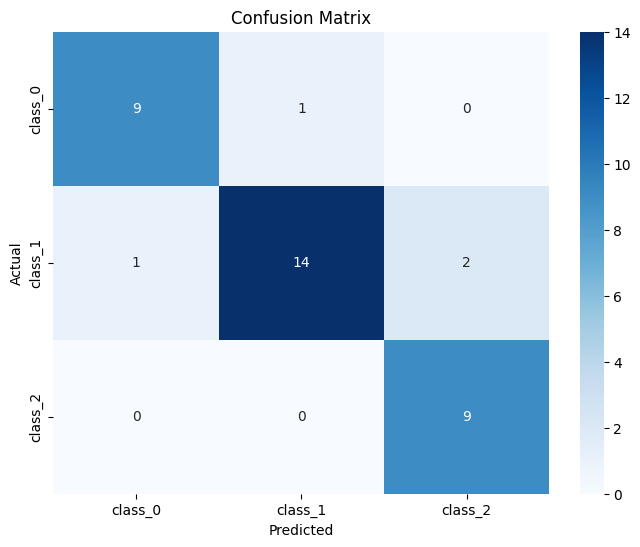

In [49]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [50]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.889


In [51]:
# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.3f}")

Precision: 0.895


In [52]:
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.3f}")

Recall: 0.889


In [53]:
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.3f}")

F1 Score: 0.888


In [54]:
# ROC Curve and AUC
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(wine.target_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

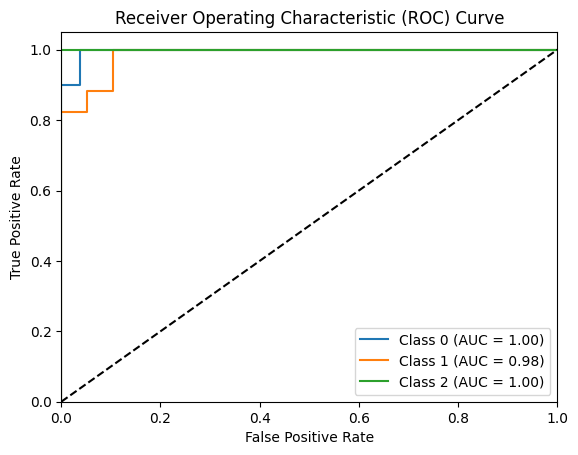

In [55]:
# Plot ROC Curve for each class
plt.figure()
for i in range(len(wine.target_names)):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [56]:
# Classification Report
report = classification_report(y_test, y_pred, target_names=wine.target_names)
print("Classification Report:")
print(report)



Classification Report:
              precision    recall  f1-score   support

     class_0       0.90      0.90      0.90        10
     class_1       0.93      0.82      0.87        17
     class_2       0.82      1.00      0.90         9

    accuracy                           0.89        36
   macro avg       0.88      0.91      0.89        36
weighted avg       0.90      0.89      0.89        36

